**Name - Aakash Jain.**

**Roll No. - 222010019.**

**Subject - Data Mining Assignment 3.**

**Library: Pandas**

**Aim: EDA analysis of data**

For the given dataset run the following queries.
a) Find the shape of the datafile.
b) Display the first 5 and last 5 records.
c) List the column headers.
d) Give discriptive statistics for the data.
e) Count the number of uniques values in each column and list the unique values.
f) Check if there are any null values?if yes, then fill in the missing values with the mean of the axis.
g) Check if there are any duplicate entries? if yes then remove the duplicate entries.
h) Find if the data has outliers? if outliers are present then remove outliers.
i) Plot distribution of the various features? (either using histogram or pairplot)
j) find if there is correlation between the features? if yes remove the features accordingly and reduce the dimensionality.
k) Give appropriate visualization for the following queries
    1. Which school has the more number of students
    2. Represent the outliers using box plot
    3. Does gender affect the average score?
    4. Does age affect average grade?
    5. Does the cohabitation status of parents (binary: "T" - living together or "A" - apart - affect the student's grades?
    6. Does advanced age affect average scores?
    7. Does travel time affect student grades?
    8. Does the education of the father and mother affect the student's grades?
    9. Does the job of the father and mother affect the student's grades?
    10. Does the quality of family relationships affect the student's grades?
    11. Does the current health status affect the student's grades ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/student_data.csv')

a) Find the shape of the datafile.

In [3]:
df.shape

(395, 33)

b) Display the first 5 and last 5 records.

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


c) List the column headers.

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

d) Give discriptive statistics for the data.

In [9]:
df.dropna().describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


e) Count the number of uniques values in each column and list the unique values.

In [14]:
df.nunique().sample(5)

famsup         2
G2            17
reason         4
guardian       3
traveltime     4
dtype: int64

f) Check if there are any null values? if yes, then fill in the missing values with the mean of the axis.

In [15]:
df.loc[df.isna().any(axis=1)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


g) Check if there are any duplicate entries? if yes then remove the duplicate entries.

In [16]:
df[df.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


h) Find if the data has outliers? if outliers are present then remove outliers.

In [11]:
absences = df['absences']
age = df['age']

df.drop(df[abs(df['absences']) > abs(df['absences'].mean() + 3 * df['absences'].std())].index, inplace=True)
df.drop(df[abs(df['age']) > abs(df['age'].mean() + 3 * df['age'].std())].index, inplace=True)

i) Plot distribution of the various features? (either using histogram or pairplot)

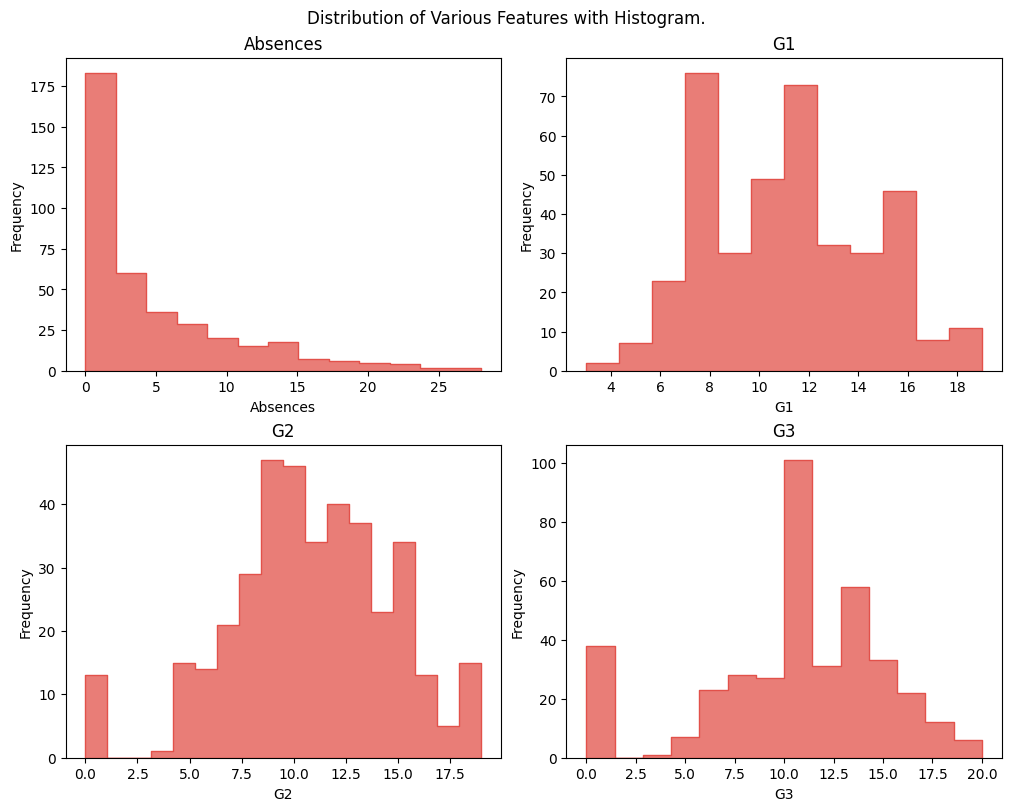

In [12]:
sns.set_palette('Spectral')

fig, ax = plt.subplots(2, 2, constrained_layout=True, figsize=(10, 8))

fig.suptitle('Distribution of Various Features with Histogram.')

sns.histplot(df['absences'], element='step', ax=ax[0, 0])
ax[0, 0].set_xlabel('Absences')
ax[0, 0].set_ylabel('Frequency')
ax[0, 0].set_title('Absences')

sns.histplot(df['G1'], element='step', ax=ax[0, 1])
ax[0, 1].set_xlabel('G1')
ax[0, 1].set_ylabel('Frequency')
ax[0, 1].set_title('G1')

sns.histplot(df['G2'], element='step', ax=ax[1, 0])
ax[1, 0].set_xlabel('G2')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].set_title('G2')

sns.histplot(df['G3'], element='step', ax=ax[1, 1])
ax[1, 1].set_xlabel('G3')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].set_title('G3')

plt.show()

j) Find if there is correlation between the features? if yes remove the features accordingly and reduce the dimensionality.

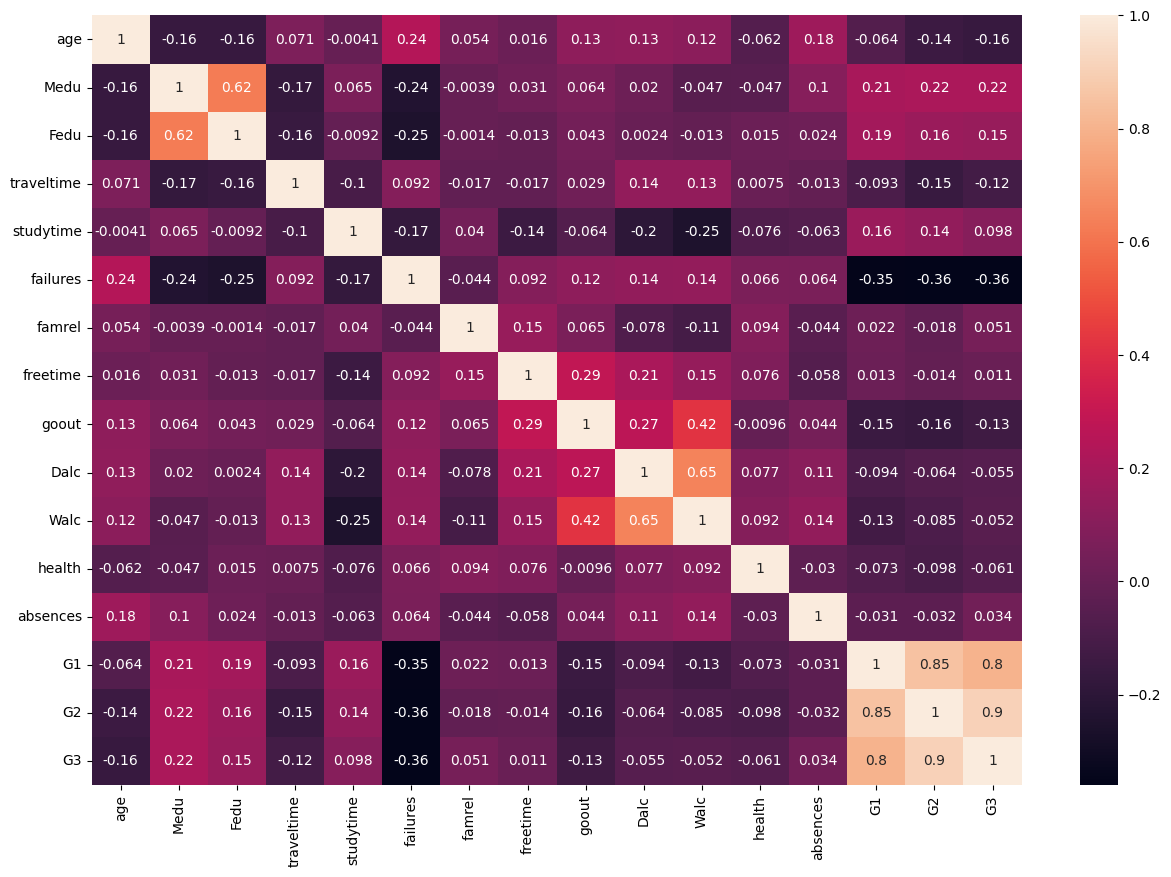

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes('int64').corr(), annot=True)
plt.show()

From the heatmap it can be interpreted that following features are weakly correlated:
* **Father's Education** and **Mother's Education**.
* **Daily Alchohol Consumption**, **Weekly Alchohol Consumption** and **Going Out**.

Strong correlation can be found between the features:
* **G1, G2 and G3** :
hence these features can be dropped after taking their averages within a new column.

In [26]:
df['Gavg'] = (df['G1'] + df['G2'] + df['G3']) / 3
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

k) Give appropriate visualization for the following queries.

    1. Which school has the more number of students.

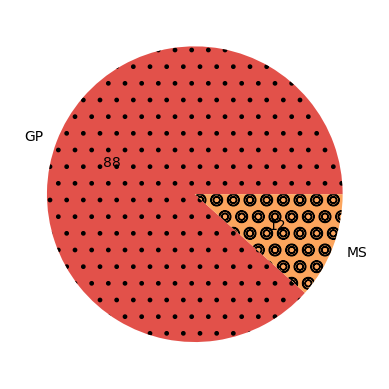

In [15]:
school_dist = df['school'].value_counts()
plt.pie(school_dist, labels=school_dist.keys(), autopct="%2.f", hatch=['.', 'oO'])
plt.show()

    2. Represent the outliers using boxplot.

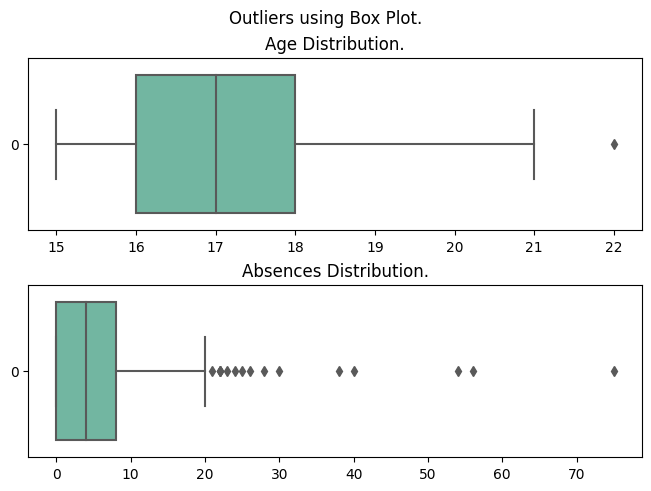

In [16]:
sns.set_palette('Set2')

fig, ax = plt.subplots(2, 1, constrained_layout=True)

fig.suptitle('Outliers using Box Plot.')

sns.boxplot(age, ax=ax[0], orient='h')
ax[0].set_title('Age Distribution.')

sns.boxplot(absences, ax=ax[1], orient='h')
ax[1].set_title('Absences Distribution.')

plt.show()

    3. Does gender affect the average score?

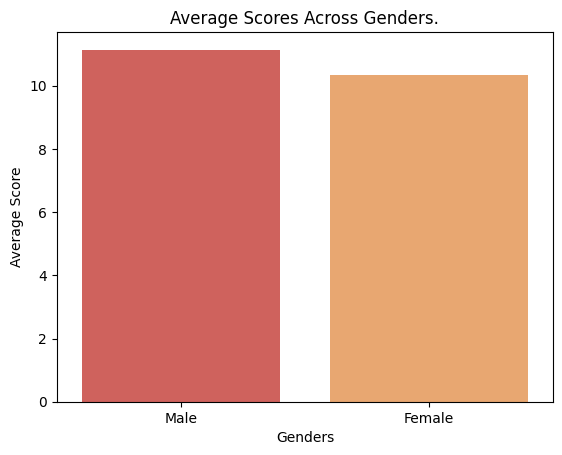

In [17]:
Mavg = df.loc[df['sex'] == 'M', 'Gavg'].mean()
Favg = df.loc[df['sex'] == 'F', 'Gavg'].mean()

sns.set_palette('Spectral')

sns.barplot(x=["Male", "Female"], y=[Mavg, Favg])
plt.xlabel('Genders')
plt.ylabel('Average Score')
plt.title('Average Scores Across Genders.')

plt.show()

    4. Does age affect average grade.    

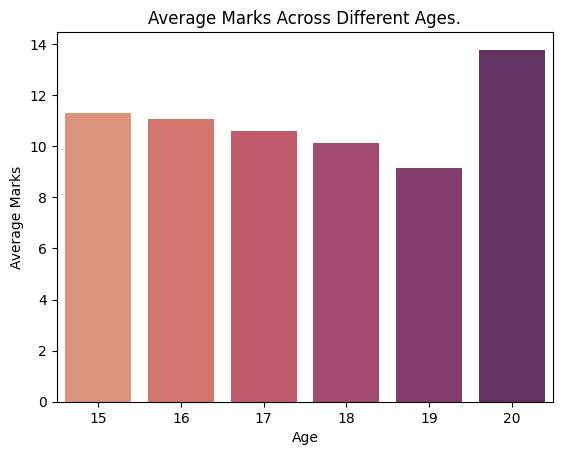

In [18]:
sns.set_palette('flare')

sns.barplot(data=df, x='age', y='Gavg', errorbar=None)
plt.xlabel('Age')
plt.ylabel('Average Marks')
plt.title('Average Marks Across Different Ages.')

plt.show()

    5. Does the cohabitation status of parents (binary: "T" - living together or "A" - apart - affect the student's grades?

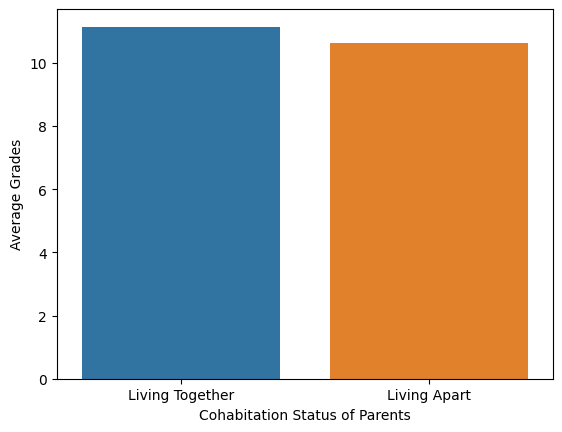

In [32]:
living_mean = df.loc[df['Pstatus'] == 'A', 'Gavg'].mean()
apart_mean = df.loc[df['Pstatus'] == 'T', 'Gavg'].mean()

# print(df.groupby('Pstatus').columns)

# sns.barplot(data=df, x=['Living Together', 'Living Apart'], y=[df.loc[df['Pstatus'] == 'A', 'Gavg'].mean(), df.loc[df['Pstatus'] == 'T', 'Gavg'].mean()])
sns.barplot(x=['Living Together', 'Living Apart'], y=[living_mean, apart_mean])
plt.xlabel('Cohabitation Status of Parents')
plt.ylabel('Average Grades')

plt.show()

    6. Does advanced age affect average scores?

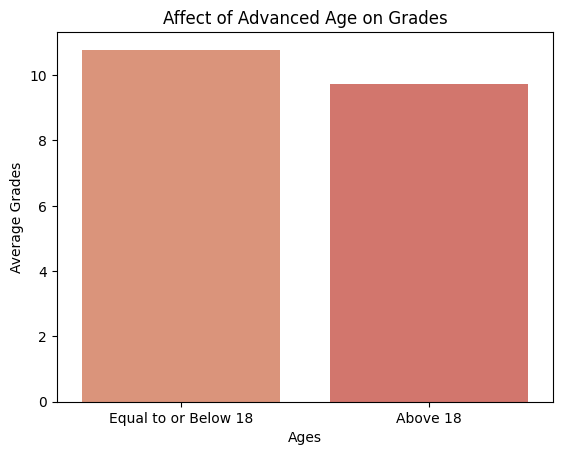

In [20]:
mean1 = df.loc[df['age'] <= 18, 'Gavg'].mean()
mean2 = df.loc[df['age'] > 18, 'Gavg'].mean()

sns.barplot(x=['Equal to or Below 18', 'Above 18'], y=[mean1, mean2])
plt.xlabel('Ages')
plt.ylabel('Average Grades')
plt.title('Affect of Advanced Age on Grades')

plt.show()

    7. Does travel time affect student grades?

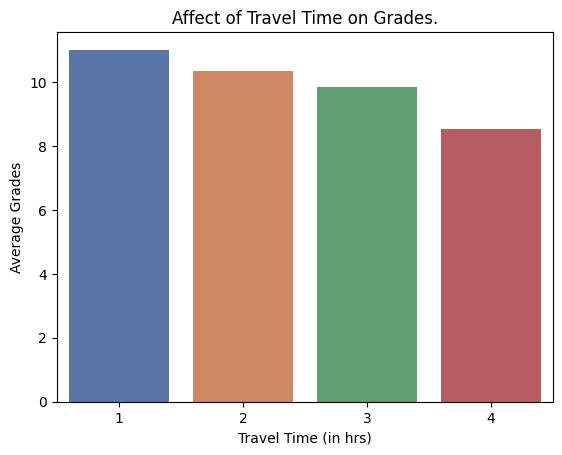

In [21]:
sns.set_palette('deep')

sns.barplot(data=df, x='traveltime', y='Gavg', errorbar=None)
plt.xlabel('Travel Time (in hrs)')
plt.ylabel('Average Grades')
plt.title('Affect of Travel Time on Grades.')

plt.show()

    8. Does the education of the father and mother affect the student's grades?

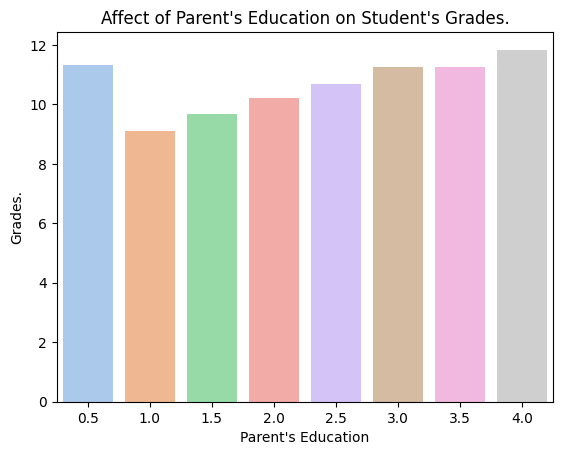

In [22]:
df['Pedu'] = (df['Fedu'] + df['Medu']) / 2

sns.set_palette('pastel')

sns.barplot(data=df, x='Pedu', y='Gavg', errorbar=None)
plt.xlabel('Parent\'s Education')
plt.ylabel('Grades.')
plt.title('Affect of Parent\'s Education on Student\'s Grades.')

plt.show()

    9. Does the job of the father and mother affect the student's grades?

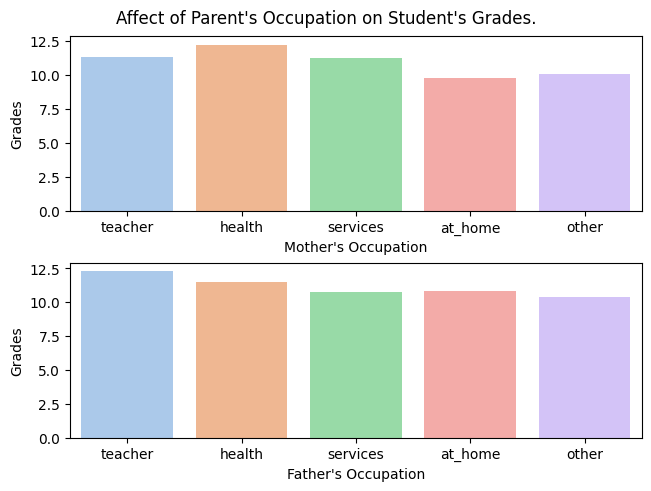

In [23]:
fig, ax = plt.subplots(2, 1, constrained_layout=True)

fig.suptitle('Affect of Parent\'s Occupation on Student\'s Grades.')

order = ['teacher', 'health', 'services', 'at_home', 'other']

sns.barplot(data=df, x='Mjob', y='Gavg', ax=ax[0], order=order, errorbar=None)
ax[0].set_xlabel('Mother\'s Occupation')
ax[0].set_ylabel('Grades')

sns.barplot(data=df, x='Fjob', y = 'Gavg', ax=ax[1], order=order, errorbar=None)
ax[1].set_xlabel('Father\'s Occupation')
ax[1].set_ylabel('Grades')

plt.show()

    10. Does the quality of family relationships affect the student's grades?

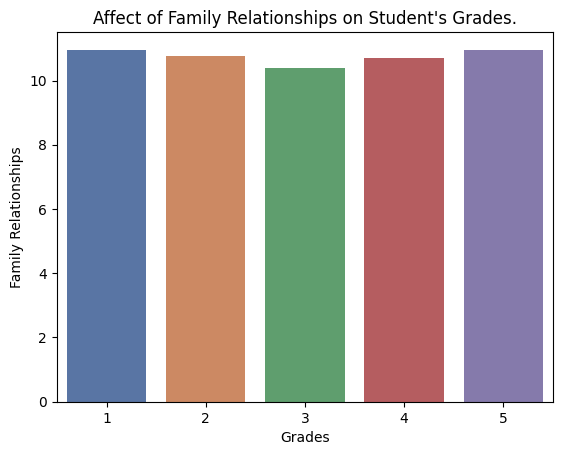

In [24]:
sns.set_palette('deep')

sns.barplot(data=df, x='famrel', y='Gavg', errorbar=None)
plt.xlabel('Grades')
plt.ylabel('Family Relationships')
plt.title("Affect of Family Relationships on Student's Grades.")
plt.show()

    11. Does the current health status affect the student's grades ?

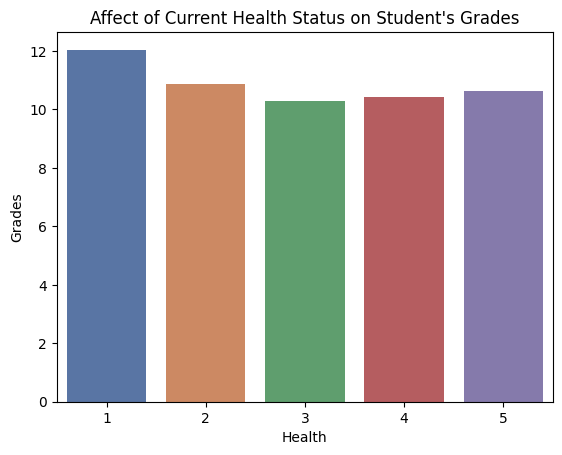

In [25]:
sns.barplot(data=df, x='health', y='Gavg', errorbar=None)
plt.xlabel('Health')
plt.ylabel('Grades')
plt.title('Affect of Current Health Status on Student\'s Grades')
plt.show()